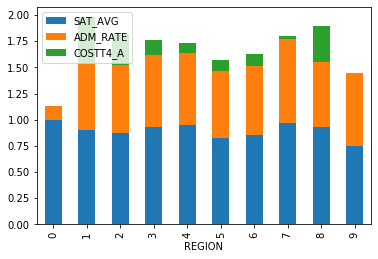

In [2]:
import matplotlib
import pandas as pd


df = pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv', usecols=['INSTNM', 'REGION', 'ADM_RATE', 'SAT_AVG', 'COSTT4_A'] )

savedf = df

cleandf = df[df.ADM_RATE > 0]
df= cleandf

cleandf = df[df.SAT_AVG > 0]
df= cleandf


def sat(sat):
    try:
        t = int(sat/1000)
    except ValueError:
        t = 0
    return t

def expense(tuition):
    try:
        t = int(tuition/50000)
    except ValueError:
        t = 0
    return t

df.iloc[:, 3] = df.iloc[:, 3].apply(sat)
df.iloc[:, 4] = df.iloc[:, 4].apply(expense)


x= df[['REGION','SAT_AVG','ADM_RATE','COSTT4_A' ]]
y= x.set_index('REGION')
z=y.groupby('REGION').mean()

z.plot.bar(stacked=True)